In [1]:
from linares_plot import *

In [26]:
file_WMloc ='C:\\Users\\David\\Documents\\GitHub\\WM-localizer\\tempo\\1.txt' 
df = pd.read_csv(file_WMloc, sep=" ") 
df =df[['first_second', 'radius', 'angle_t1', 'angle_t2', 'angle_p1', 'angle_p2', 'correct_direction', 'Response', 'C_I_M', 'start_trial', 
   'presentation_checkboard_time', 'presentation_target_time', 'start_delay',  'end_delay', 'presentation_probe_time', 'response_time' ]]



In [27]:
df.head(10)
## C_I_M stands for correct (0), incorrect (1), miss (999) or the other way arround. 
## We accept that the one with more is correct. 
## If the same, exclude the subject

,first_second,radius,angle_t1,angle_t2,angle_p1,angle_p2,correct_direction,Response,C_I_M,start_trial,presentation_checkboard_time,presentation_target_time,start_delay,end_delay,presentation_probe_time,response_time
0,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292,41.292
1,1.000,14.000,160.000,135.000,151.000,126.000,1.000,0.000,999.000,43.757,43.757,44.215,44.546,47.718,47.718,0.000
2,2.000,14.000,160.000,135.000,151.000,126.000,1.000,0.000,999.000,43.757,43.757,50.519,50.851,54.022,54.022,0.000
3,1.000,14.000,12.000,69.000,10.000,76.000,-1.000,1.000,1.000,59.512,59.512,59.840,60.308,63.343,63.343,64.260
4,2.000,14.000,12.000,69.000,10.000,76.000,1.000,-1.000,1.000,59.512,59.512,65.814,66.145,69.317,69.317,70.048
5,1.000,14.000,218.000,229.000,217.000,226.000,1.000,1.000,0.000,75.143,75.143,75.604,75.936,79.107,79.107,80.057
6,2.000,14.000,218.000,229.000,217.000,226.000,1.000,-1.000,1.000,75.143,75.143,80.992,81.473,84.494,84.494,85.178
7,1.000,14.000,240.000,191.000,239.000,190.000,1.000,-1.000,1.000,90.733,90.733,90.982,91.464,94.485,94.485,95.635
8,2.000,14.000,240.000,191.000,239.000,190.000,1.000,1.000,0.000,90.733,90.733,96.803,97.134,100.306,100.306,101.240
9,1.000,14.000,344.000,327.000,340.000,331.000,-1.000,-1.000,0.000,106.597,106.597,107.061,107.528,110.563,110.563,113.132


In [28]:
if sum(df['C_I_M']==1) > sum(df['C_I_M']==0):
    df['CIM']=df['C_I_M'].replace([0,1,999], ['wrong', 'correct', 'miss'])
elif sum(df['C_I_M']==0) > sum(df['C_I_M']==1):
    df['CIM']=df['C_I_M'].replace([0,1,999], ['correct', 'wrong', 'miss'])
else:
    print('Exclude')

4
9
27


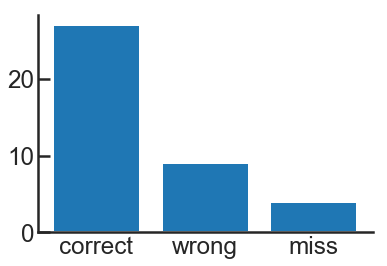

In [33]:
#print(sum(df['CIM']=='miss'))
#print(sum(df['CIM']=='wrong'))
#print(sum(df['CIM']=='correct'))

plt.bar([0,1,2], [sum(df['CIM']=='correct'), sum(df['CIM']=='wrong'), sum(df['CIM']=='miss')],  )
plt.xticks([0,1,2], ['correct', 'wrong', 'miss'])
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#adjust_spines(plt.gca(), ['left', 'bottom'])